In [1]:
from orbitflows import HamiltonianMappingModel, generate_sho_orbits
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
def isoDiskPotential(x, amp=1, sigma=0.1):
    _H = sigma / torch.sqrt(torch.tensor([8.0 * torch.pi * amp]))[0]
    _sigma2 = sigma**2
    return 2.0 * _sigma2 * torch.log(torch.cosh(0.5 * x / _H))

In [3]:
model = HamiltonianMappingModel(targetPotential=isoDiskPotential, input_dim=2, hidden_dim=128, num_layers=64)
model.flow

GsympNetFlow(
  (layers): ModuleList(
    (0-63): 64 x SymplecticCouplingLayer(
      (conditioner): GradientBasedConditioner()
    )
  )
)

In [4]:
n_actions = 1
n_angles = 1000
r_min = 0.5
r_max = 1.5
omega_guess = 1
training_data, aa_guess = generate_sho_orbits(n_actions, omega=omega_guess, t_end=10, n_steps=n_angles, r_bounds=[r_min,r_max]) #

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_49662/901092765.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/aten/src/ATen/native/TensorShape.cpp:3687.)
  plt.scatter(*training_data.T)



Text(0.5, 1.0, 'Toy Orbits')

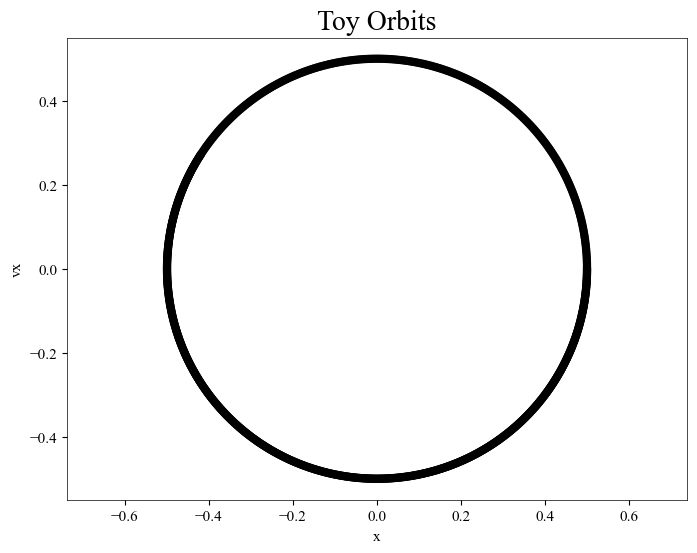

In [5]:
plt.scatter(*training_data.T)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('vx')
plt.title('Toy Orbits', fontsize=20)

training: 1500 step with 5 orbits
1000 steps with 20 orbits

In [12]:
steps = 400
model.train(training_data, steps, lr=1e-3)

100%|██████████| 200/200 [00:11<00:00, 17.64it/s]


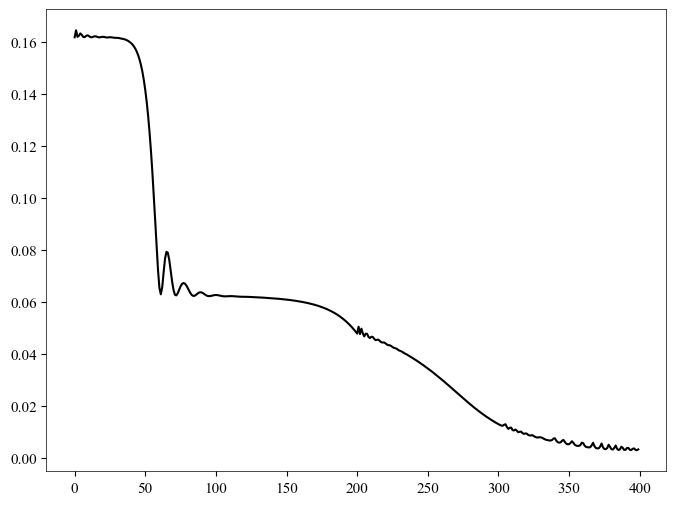

In [13]:
plt.plot(model.loss_list)

In [14]:
ps_nf = model.aa_to_ps(aa_guess)

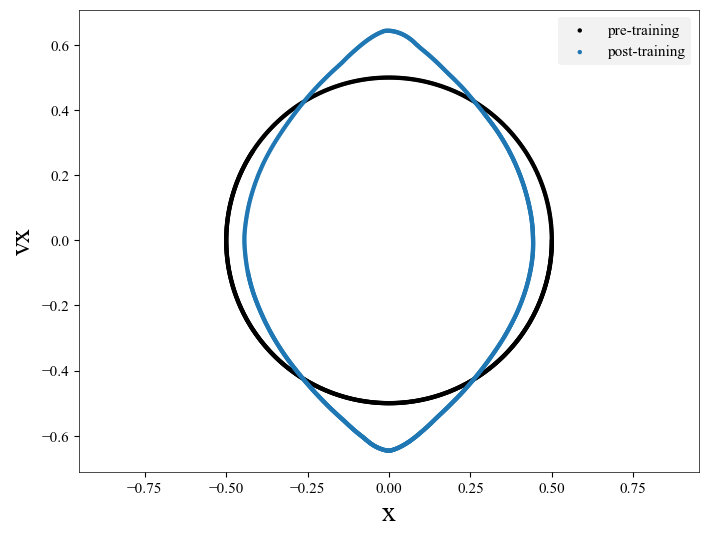

In [15]:
plt.scatter(*training_data.T.detach(), s=10, label='pre-training')
plt.scatter(*ps_nf.T.detach(), s=10, label='post-training')
plt.axis('equal')
plt.xlabel('x', fontsize=20)
plt.ylabel('vx', fontsize=20)
plt.legend()
plt.show()

In [16]:
from orbitflows import H

Text(0, 0.5, 'energy')

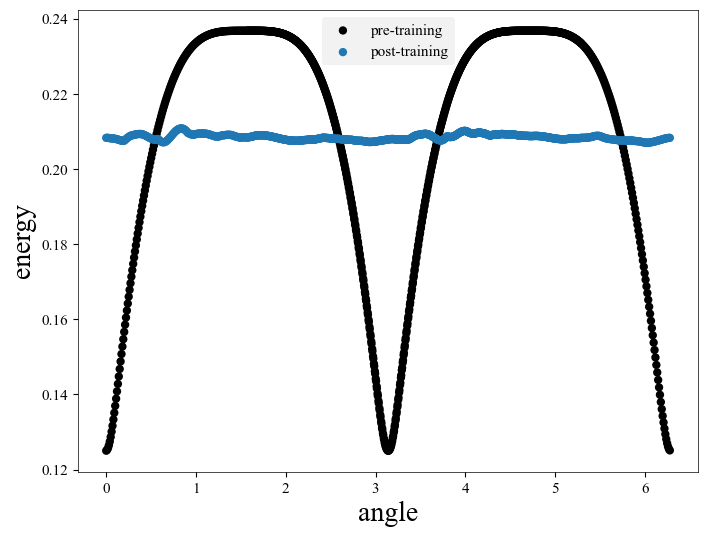

In [17]:
plt.scatter(aa_guess[...,0], H(training_data, model.targetPotential).detach(), label='pre-training')
plt.scatter(aa_guess[...,0], model.hamiltonian(aa_guess).detach(), label='post-training')
plt.legend()
plt.xlabel('angle', fontsize=20)
plt.ylabel('energy', fontsize=20)

In [18]:
# j_list = torch.linspace(0.1, 1.3, 1000, requires_grad=True)

# aa_list = torch.zeros((len(j_list), 2))
# aa_list[..., 1] = j_list
# h_list = model.hamiltonian(aa_list)
# plt.plot(j_list.detach(), h_list.detach())
# plt.xlabel('J', fontsize=20)
# plt.ylabel('H(J)', fontsize=20)

In [19]:
# model.frequency(aa_list)

In [20]:
# freq_list = torch.zeros(len(j_list))
# for i, aa in enumerate(aa_list):
#     freq_list[i] = model.frequency(aa)

In [21]:
# plt.plot(j_list.detach(), freq_list.detach())
# plt.xlabel('J', fontsize=20)
# plt.ylabel('$\Omega$(J)', fontsize=20)

In [ ]:
aa0 = torch.tensor([1.5, 0.2], requires_grad=True)#aa_guess[0][0].clone().requires_grad_(True)


In [64]:
aa0

tensor([1.5000, 0.2000], requires_grad=True)

In [65]:
steps = 100
t_end = 1
aa_integrated = model.integrate(aa0, steps, t_end)

100%|██████████| 100/100 [00:04<00:00, 24.21it/s]


Text(0, 0.5, 'H(t)')

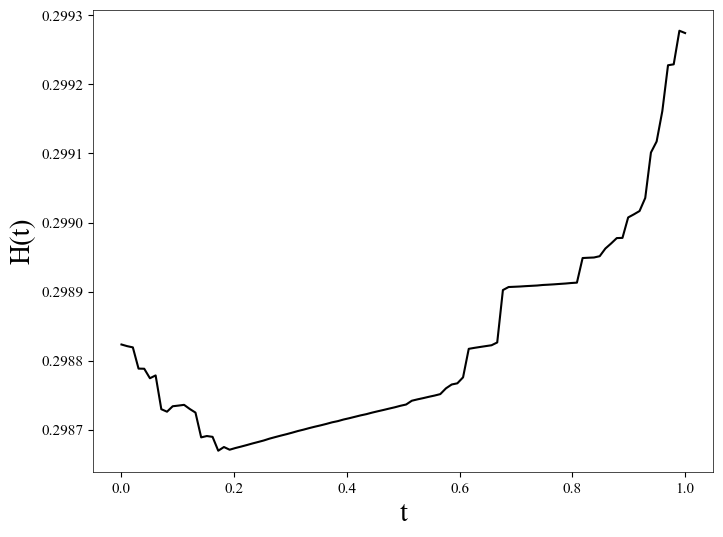

In [66]:
plt.plot(np.linspace(0, t_end, steps), model.hamiltonian(aa_integrated).detach())
plt.xlabel('t', fontsize=20)
plt.ylabel('H(t)', fontsize=20)

In [67]:
# # check how integration improves after training more
# initial_steps = len(model.loss_list)
# for i in range(5):
#     print(f'iteration {i}:')
#     model.train(training_data, 200)
#     _aa_integrated = model.integrate(aa0, steps, t_end)
#     plt.plot(np.linspace(0, t_end, steps), model.hamiltonian(_aa_integrated).detach(), label=f'{(i+1)* 200 + initial_steps}')
# plt.xlabel('time', fontsize=20)
# plt.ylabel('energy', fontsize=20)
# plt.legend(title='training steps')
# plt.show()

In [68]:
# check how integration improves after training more
# initial_steps = len(model.loss_list)
# for i in range(5):
#     print(f'iteration {i}:')
#     model.train(training_data, 200)
#     _aa_integrated = model.integrate(aa0, steps, t_end)
#     plt.plot(np.linspace(0, t_end, steps), model.hamiltonian(_aa_integrated).detach(), label=f'{(i+1)* 200 + initial_steps}')
# plt.xlabel('time', fontsize=20)
# plt.ylabel('energy', fontsize=20)
# plt.legend(title='training steps')
# plt.show()

In [69]:
# # check how changing time step improves after integration
# t_end = 1
# for i, dt in enumerate(np.array([0.1, 0.01, 0.001, 0.0005])):
#     print(f'iteration {i}:')
#     n_steps = int(t_end / dt)
#     _aa_integrated = model.integrate(aa0, steps=n_steps, t_end=t_end)
#     plt.plot(np.linspace(0, 1, n_steps), model.hamiltonian(_aa_integrated).detach(), label=f'dt = {dt}')
# plt.xlabel('time', fontsize=20)
# plt.ylabel('energy', fontsize=20)
# plt.legend()
# plt.show()

In [70]:
# plt.plot(np.linspace(0, 1, n_steps), model.hamiltonian(_aa_integrated).detach(), label=f'dt = {dt}')
# plt.xlabel('time', fontsize=20)
# plt.ylabel('energy', fontsize=20)
# plt.legend()

Text(0, 0.5, 'energy')

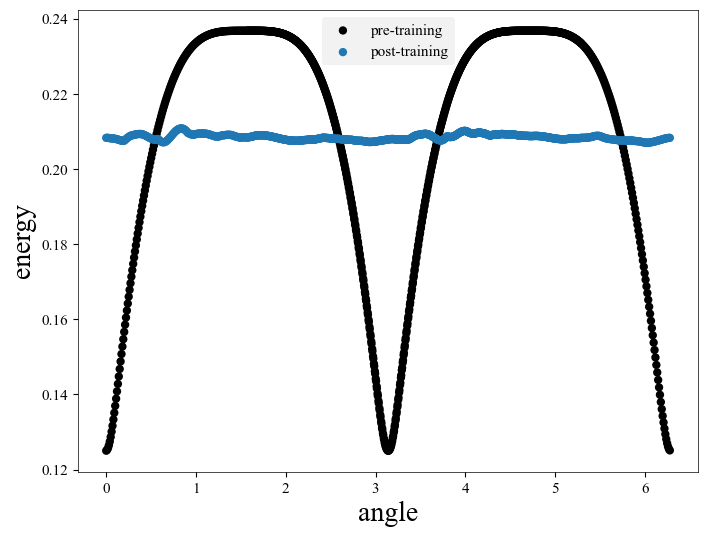

In [71]:
plt.scatter(aa_guess[...,0], H(training_data, model.targetPotential).detach(), label='pre-training')
plt.scatter(aa_guess[...,0], model.hamiltonian(aa_guess).detach(), label='post-training')
plt.legend()
plt.xlabel('angle', fontsize=20)
plt.ylabel('energy', fontsize=20)

# grid of H_err

In [72]:
from orbitflows.integrate import hamiltonian_fixed_angle

In [73]:
def h_error(model, ps):
    '''
    Compute the error of the model prediction in the Hamiltonian.
    
    Parameters
    ----------
    ps : torch.tensor
        phase-space point
    
    Returns
    -------
    torch.tensor
        Hamiltonian error of the model prediction
    '''
    _aa = model.ps_to_aa(ps)
    return H(ps, model.targetPotential) - hamiltonian_fixed_angle(model, _aa)

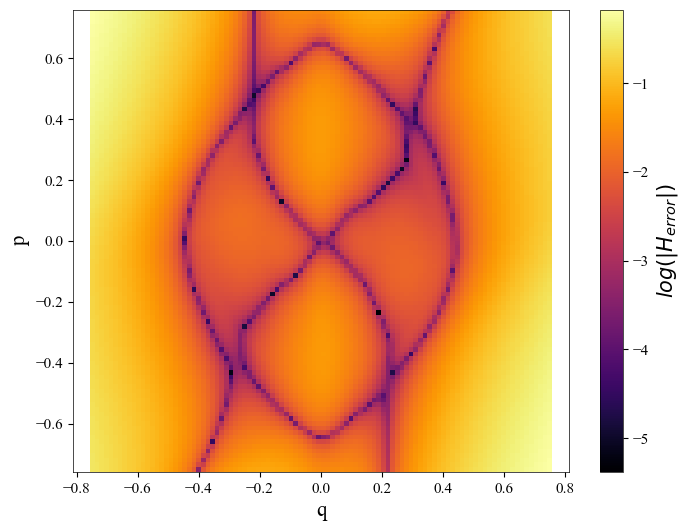

In [74]:
# Determine the range for q (x) and p (vx) from training data
scaling = 1.5
x_min, x_max = training_data[..., 0].min().item() * scaling, training_data[..., 0].max().item() * scaling
vx_min, vx_max = training_data[..., 1].min().item() * scaling, training_data[..., 1].max().item() * scaling

# Create a grid of points in phase space
n_grid_points = 100 # Number of points for each dimension in the grid
x_grid = torch.linspace(x_min, x_max, n_grid_points)
vx_grid = torch.linspace(vx_min, vx_max, n_grid_points)
X, VX = torch.meshgrid(x_grid, vx_grid, indexing='xy')

# Prepare phase-space points for h_error function
# Shape: (n_grid_points*n_grid_points, 2)
ps_grid = torch.stack([X.flatten(), VX.flatten()], dim=1)

# Calculate h_error for each point in the grid
# Ensure ps_grid is on the same device as model parameters if using GPU
# For this example, assuming CPU
error_values = torch.zeros(ps_grid.shape[0])
# Batch processing if memory is an issue, but for 100x100 it should be fine
with torch.no_grad(): # No need to track gradients for plotting
    error_values = h_error(model, ps_grid)

# Reshape error_values to the grid shape
error_grid = error_values.reshape(n_grid_points, n_grid_points)

# Plot the colormap
plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(X.numpy(), VX.numpy(), np.log10(np.abs(error_grid.numpy())), cmap='inferno', shading='auto')
plt.colorbar(pcm)
pcm.colorbar.set_label('$log(|H_{error}|)$', fontsize=15)
# Set colorbar limits to make the plot more informative if needed
# For example, to focus on a specific range of error values:
error_min = error_grid.min().item()
error_max = error_grid.max().item()
#pcm.set_clim(-0.2, 0.2)

plt.xlabel('q', fontsize=15)
plt.ylabel('p', fontsize=15)
plt.axis('equal') # Keep aspect ratio for phase space
plt.show()

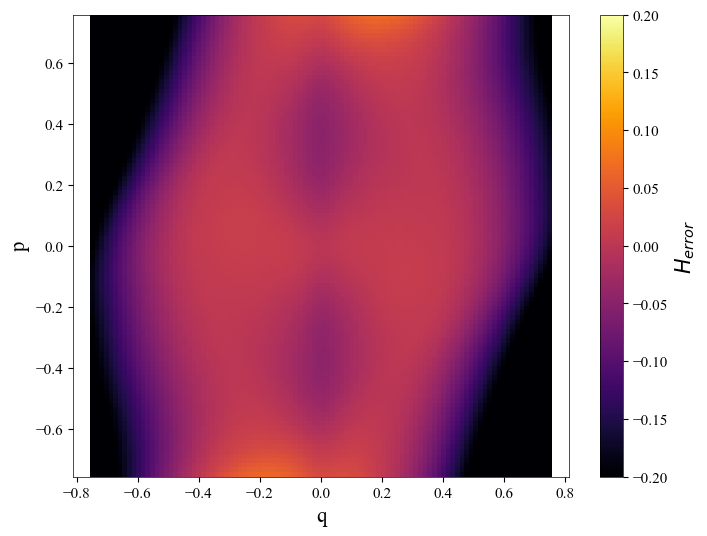

In [75]:
# Determine the range for q (x) and p (vx) from training data
scaling = 1.5
x_min, x_max = training_data[..., 0].min().item() * scaling, training_data[..., 0].max().item() * scaling
vx_min, vx_max = training_data[..., 1].min().item() * scaling, training_data[..., 1].max().item() * scaling

# Create a grid of points in phase space
n_grid_points = 100 # Number of points for each dimension in the grid
x_grid = torch.linspace(x_min, x_max, n_grid_points)
vx_grid = torch.linspace(vx_min, vx_max, n_grid_points)
X, VX = torch.meshgrid(x_grid, vx_grid, indexing='xy')

# Prepare phase-space points for h_error function
# Shape: (n_grid_points*n_grid_points, 2)
ps_grid = torch.stack([X.flatten(), VX.flatten()], dim=1)

# Calculate h_error for each point in the grid
# Ensure ps_grid is on the same device as model parameters if using GPU
# For this example, assuming CPU
error_values = torch.zeros(ps_grid.shape[0])
# Batch processing if memory is an issue, but for 100x100 it should be fine
with torch.no_grad(): # No need to track gradients for plotting
    error_values = h_error(model, ps_grid)

# Reshape error_values to the grid shape
error_grid = error_values.reshape(n_grid_points, n_grid_points)

# Plot the colormap
plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(X.numpy(), VX.numpy(), error_grid.numpy(), cmap='inferno', shading='auto')
plt.colorbar(pcm)
pcm.colorbar.set_label('$H_{error}$', fontsize=15)
# Set colorbar limits to make the plot more informative if needed
# For example, to focus on a specific range of error values:
error_min = error_grid.min().item()
error_max = error_grid.max().item()
pcm.set_clim(-0.2, 0.2)

plt.xlabel('q', fontsize=15)
plt.ylabel('p', fontsize=15)
plt.axis('equal') # Keep aspect ratio for phase space
plt.show()